   genre        artist_name                        track_name  \
0  Movie     Henri Salvador       C'est beau de faire un Show   
1  Movie  Martin & les fées  Perdu d'avance (par Gad Elmaleh)   
2  Movie    Joseph Williams    Don't Let Me Be Lonely Tonight   
3  Movie     Henri Salvador    Dis-moi Monsieur Gordon Cooper   
4  Movie       Fabien Nataf                         Ouverture   

                 track_id  popularity  acousticness  danceability  \
0  0BRjO6ga9RKCKjfDqeFgWV           0         0.611         0.389   
1  0BjC1NfoEOOusryehmNudP           1         0.246         0.590   
2  0CoSDzoNIKCRs124s9uTVy           3         0.952         0.663   
3  0Gc6TVm52BwZD07Ki6tIvf           0         0.703         0.240   
4  0IuslXpMROHdEPvSl1fTQK           4         0.950         0.331   

   duration_ms  energy  instrumentalness key  liveness  loudness   mode  \
0        99373   0.910             0.000  C#    0.3460    -1.828  Major   
1       137373   0.737             0.000  F#

array([[<Axes: title={'center': 'popularity'}>,
        <Axes: title={'center': 'acousticness'}>,
        <Axes: title={'center': 'danceability'}>],
       [<Axes: title={'center': 'duration_ms'}>,
        <Axes: title={'center': 'energy'}>,
        <Axes: title={'center': 'instrumentalness'}>],
       [<Axes: title={'center': 'liveness'}>,
        <Axes: title={'center': 'loudness'}>,
        <Axes: title={'center': 'speechiness'}>],
       [<Axes: title={'center': 'tempo'}>,
        <Axes: title={'center': 'valence'}>, <Axes: >]], dtype=object)

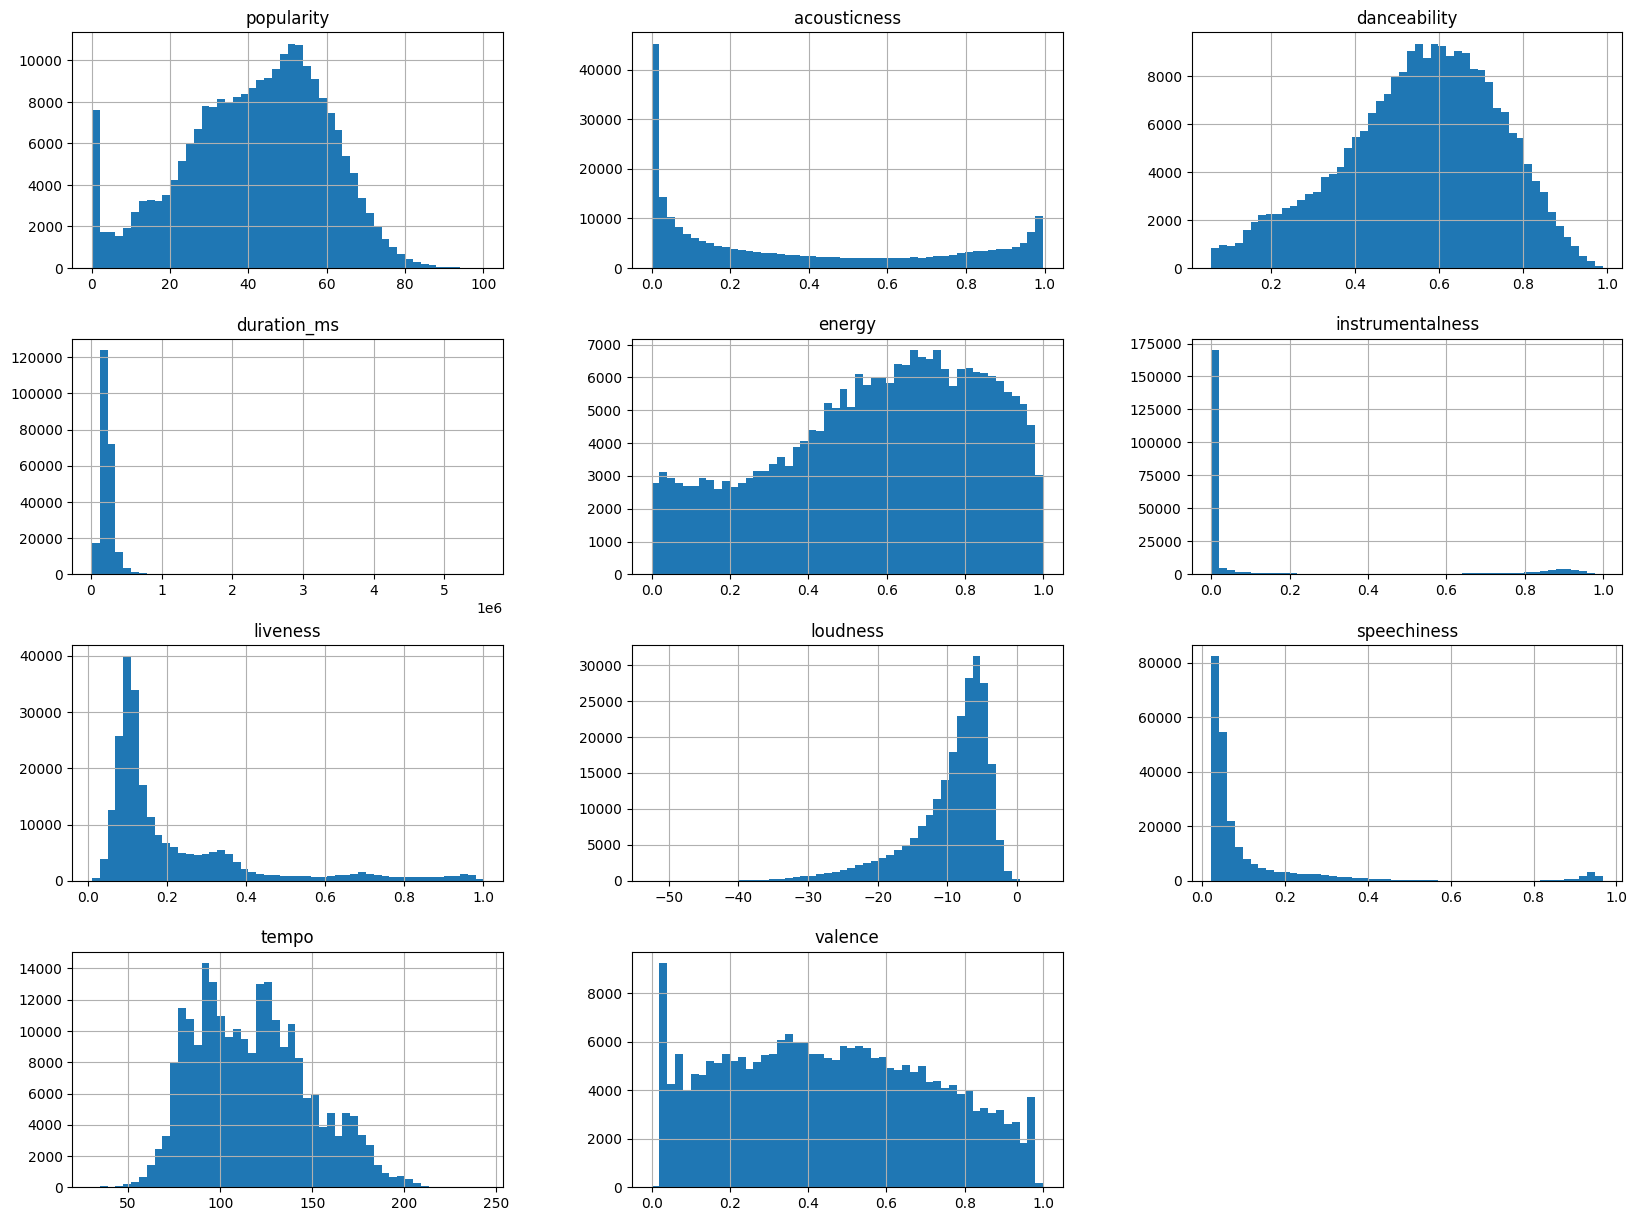

In [1]:
import numpy as np
import pandas as pd
df = pd.read_csv('./RawData.csv')
print(df.head())
print(df.columns)

unique_genres = df['genre'].unique()
print(unique_genres)
df.hist(bins=50, figsize=(20, 15))

In [2]:
# 檢查重複值
duplicates = df.duplicated(subset=['track_id'])
# 檢查缺失值
missing_data = df.isnull().sum()
# 移除重複值
df = df.drop_duplicates(subset=['track_id'], keep='first')
# 移除有缺失值的行
df = df.dropna()

# 重新檢查重複值和缺失值
duplicates = df.duplicated(subset=['track_id'])
missing_data = df.isnull().sum()

print(duplicates.sum())
print(missing_data)

0
genre               0
artist_name         0
track_name          0
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64


In [3]:
#新增欄位 把毫秒轉成分鐘
df['duration_mins'] = df['duration_ms'] / 60000
df['duration_mins'] # 看是否轉換成功

# drop掉舊的毫秒欄位 還有id欄位
df = df.drop(['artist_name', 'track_name', 'track_id', 'duration_ms'], axis=1)
# 看new df
df.head()

,genre,popularity,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,duration_mins
0,Movie,0,0.611,0.389,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814,1.656217
1,Movie,1,0.246,0.590,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816,2.289550
2,Movie,3,0.952,0.663,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368,2.837783
3,Movie,0,0.703,0.240,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227,2.540450
4,Movie,4,0.950,0.331,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390,1.377083


In [4]:
# Count the rows where 'instrumentalness' is equal to 1
count = df[df['instrumentalness'] == 1].shape[0]
# Display the count
print(f"instrumentalness等於1的數據數量: {count}")

# Filter out songs where instrumentalness is equal to 1
data_filtered = df[df['instrumentalness'] != 1]

# 使用布林索引篩選出speechiness大於0.66的數據
speechiness_high = data_filtered[data_filtered['speechiness'] > 0.66]
# 計算這些數據的數量
speechiness_high_count = len(speechiness_high)
print('speechiness大於0.66的數據數量:', speechiness_high_count)

# 剔除speechiness大於0.66的數據
data_filtered = data_filtered[data_filtered['speechiness'] <= 0.66]

# 檢查data1_cleaned中speechiness大於0.66的數據數量
invalid_data_count = len(data_filtered[data_filtered['speechiness'] > 0.66])

# 比較原始數據集和data1_cleaned的數據條目數量
original_count = len(df)
cleaned_count = len(data_filtered)
difference = original_count - cleaned_count

invalid_data_count, difference

instrumentalness等於1的數據數量: 0
speechiness大於0.66的數據數量: 9337


(0, 9337)

In [5]:
import numpy as np

# 為了避免負值和零，對 loudness 進行正值轉換，因為它可能有負值
data_filtered['loudness'] = data_filtered['loudness'] - data_filtered['loudness'].min() + 1
data_filtered['speechiness'] = data_filtered['speechiness'] - data_filtered['speechiness'].min() + 1
data_filtered['liveness'] = data_filtered['liveness'] - data_filtered['liveness'].min() + 1

# 平方轉換 loudness
data_filtered['loudness'] = data_filtered['loudness'] ** 2

# 平方根轉換 speechiness 和 liveness
data_filtered['speechiness'] = np.sqrt(data_filtered['speechiness'])
data_filtered['liveness'] = np.sqrt(data_filtered['liveness'])

# 顯示轉換後的特徵的前幾行
print(data_filtered.head())

   genre  popularity  acousticness  danceability  energy  instrumentalness  \
0  Movie           0         0.611         0.389   0.910             0.000   
1  Movie           1         0.246         0.590   0.737             0.000   
2  Movie           3         0.952         0.663   0.131             0.000   
3  Movie           0         0.703         0.240   0.326             0.000   
4  Movie           4         0.950         0.331   0.225             0.123   

  key  liveness     loudness   mode  speechiness    tempo time_signature  \
0  C#  1.155997  2665.553641  Major     1.015037  166.969            4/4   
1  F#  1.068330  2294.218404  Minor     1.031795  174.003            4/4   
2   C  1.045624  1566.418084  Minor     1.006976   99.488            5/4   
3  C#  1.043470  1703.955841  Major     1.008613  171.758            4/4   
4   F  1.091939  1043.742249  Major     1.011632  140.576            4/4   

   valence  duration_mins  
0    0.814       1.656217  
1    0.816       2

array([[<Axes: title={'center': 'popularity'}>,
        <Axes: title={'center': 'acousticness'}>,
        <Axes: title={'center': 'danceability'}>],
       [<Axes: title={'center': 'energy'}>,
        <Axes: title={'center': 'instrumentalness'}>,
        <Axes: title={'center': 'liveness'}>],
       [<Axes: title={'center': 'loudness'}>,
        <Axes: title={'center': 'speechiness'}>,
        <Axes: title={'center': 'tempo'}>],
       [<Axes: title={'center': 'valence'}>,
        <Axes: title={'center': 'duration_mins'}>, <Axes: >]],
      dtype=object)

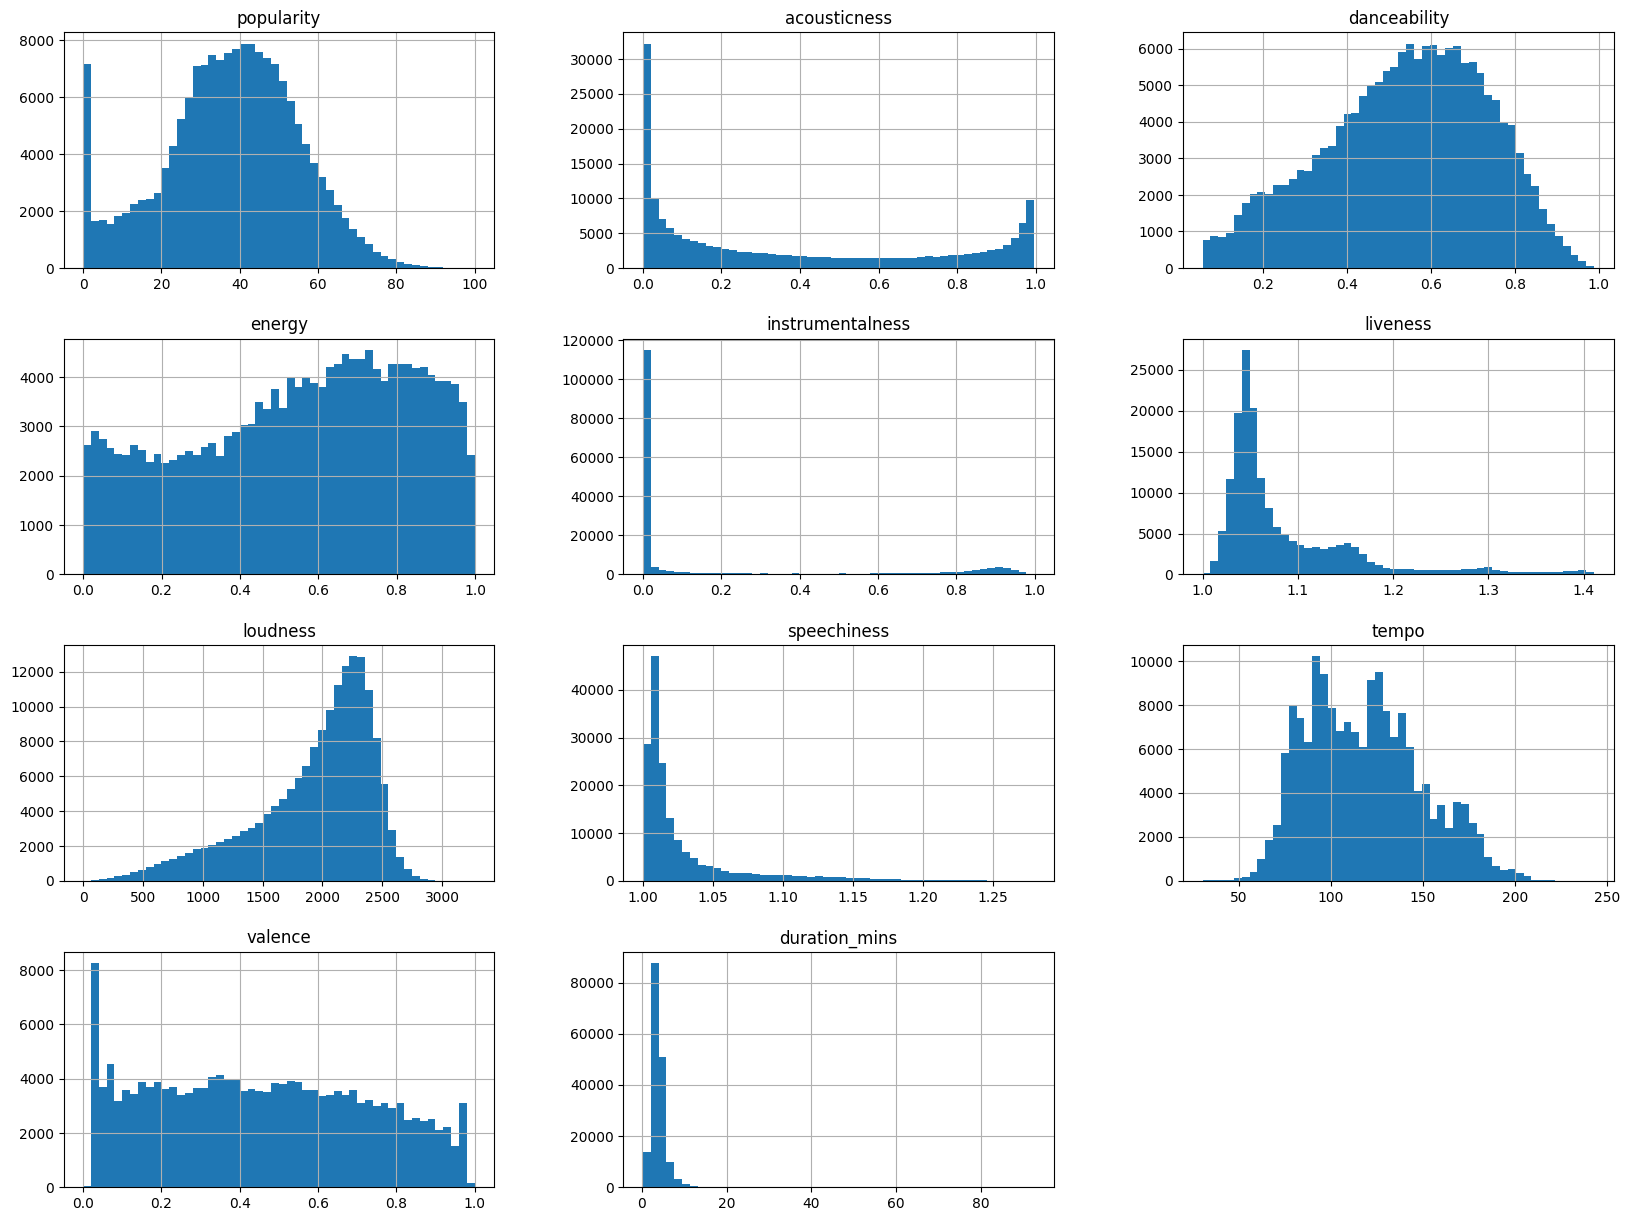

In [6]:
data_filtered.hist(bins=50, figsize=(20, 15))

In [7]:
# 曲風特徵濃縮
genre_mapping = {
    'Pop': ['Pop', 'pop', 'power-pop', 'indie-pop', 'pop-film', 'k-pop', 'cantopop', 'trip-hop', 'party', 'Anime', 'anime', 'Movie', 'movie'],
    'Electronic': ['Electronic', 'electronic', 'edm', 'techno', 'trance', 'minimal-techno', 'progressive-house', 'deep-house', 'detroit-techno',
                   'house', 'club', 'breakbeat', 'hardstyle', 'drum-and-bass', 'industrial', 'chicago-house', 'hardcore', 'electro'],
    'Reggae': ['Reggae', 'reggae', 'dancehall', 'dubstep', 'dub', 'Ska', 'ska', 'Reggaeton', 'reggaeton'],
    'Rock': ['Rock', 'rock', 'alt-rock', 'punk-rock', 'psych-rock', 'hard-rock', 'rock-n-roll', 'punk', 'emo', 'goth', 'Alternative', 'alternative'],
    'Dance': ['Dance', 'dance', 'disco', 'tango', 'samba', 'salsa'],
    'Classical': ['Classical', 'classical', 'Opera', 'opera'],
    'Folk': ['Folk', 'folk', 'Country', 'country', 'forro', 'sertanejo'],
    'Blues_Jazz': ['Blues', 'blues', 'funk', 'groove', 'Jazz', 'jazz', 'Soul', 'soul', 'R&B', 'r&b'],
    'World': ['World', 'world', 'indian', 'spanish', 'swedish', 'afrobeat', 'german', 'french'],
    'Hip-Hop': ['Hip-Hop', 'hip-hop', 'Hip Hop', 'hip hop', 'Rap', 'rap'],
    'Indie': ['Indie', 'indie', 'garage', 'singer-songwriter', 'songwriter', 'show-tunes'],
    'Other': ['Comedy', 'comedy', 'sleep', 'Children’s Music', 'children’s music', "Children's Music", "children's music", 'A Capella', 'a capella', 'Soundtrack', 'soundtrack', 'metal', 'black-metal', 'death-metal', 'heavy-metal', 'metalcore', 'grindcore', 'acoustic', 'guitar', 'piano', 'romance', 'sad', 'ambient', 'chill', 'new-age', 'gospel']
}

# 根據分類方案進行置換
for category, genres in genre_mapping.items():
    data_filtered.loc[data_filtered['genre'].isin(genres), 'genre'] = category

# 打印處理後的DataFrame
ch_nunique_genres = data_filtered['genre'].nunique()
ch_unique_genres = data_filtered['genre'].unique()

print(f"曲風種類: ", ch_unique_genres)
print(f"曲風種類數量: ", ch_nunique_genres)
other_count = data_filtered[data_filtered['genre'] == 'other'].shape[0]
print(f"other 類別的曲風數量: {other_count}")

曲風種類:  ['Pop' 'Blues_Jazz' 'Other' 'Rock' 'Folk' 'Dance' 'Electronic' 'Classical'
 'Hip-Hop' 'Indie' 'Reggae' 'World']
曲風種類數量:  12
other 類別的曲風數量: 0


In [8]:
# 使用 pandas 的 get_dummies 函数进行独热编码
genre_one_hot = pd.get_dummies(data_filtered['genre'], prefix='gn')

# 合併独热编码的结果到原始 DataFrame
data_filtered = pd.concat([data_filtered, genre_one_hot], axis=1)
#drop原有的genre 跟 time_signature兩個欄位
data_filtered = data_filtered.drop(['genre', 'time_signature', 'key', 'mode'], axis=1)
# 顯示轉換後的 DataFrame
data_filtered.head()

# 少了year及曲風少了三個類別

,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,...,gn_Dance,gn_Electronic,gn_Folk,gn_Hip-Hop,gn_Indie,gn_Other,gn_Pop,gn_Reggae,gn_Rock,gn_World
0,0,0.611,0.389,0.910,0.000,1.155997,2665.553641,1.015037,166.969,0.814,...,False,False,False,False,False,False,True,False,False,False
1,1,0.246,0.590,0.737,0.000,1.068330,2294.218404,1.031795,174.003,0.816,...,False,False,False,False,False,False,True,False,False,False
2,3,0.952,0.663,0.131,0.000,1.045624,1566.418084,1.006976,99.488,0.368,...,False,False,False,False,False,False,True,False,False,False
3,0,0.703,0.240,0.326,0.000,1.043470,1703.955841,1.008613,171.758,0.227,...,False,False,False,False,False,False,True,False,False,False
4,4,0.950,0.331,0.225,0.123,1.091939,1043.742249,1.011632,140.576,0.390,...,False,False,False,False,False,False,True,False,False,False


In [13]:
from sklearn.preprocessing import MinMaxScaler

# Features to standardize
features_to_standardize = ['loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'tempo', 'duration_mins']

# Initialize the MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Apply the scaling to the df dataframe
data_filtered[features_to_standardize] = scaler.fit_transform(data_filtered[features_to_standardize])

# Display the first few rows of the scaled features
print(data_filtered[features_to_standardize].head())

   loudness  speechiness  acousticness  instrumentalness  liveness     tempo  \
0  0.814610     0.053748      0.613454          0.000000  0.379749  0.642704   
1  0.701085     0.113647      0.246988          0.000000  0.166339  0.675801   
2  0.478581     0.024934      0.955823          0.000000  0.111064  0.325182   
3  0.520630     0.030786      0.705823          0.000000  0.105821  0.665238   
4  0.318788     0.041579      0.953815          0.123123  0.223809  0.518516   

   duration_mins  
0       0.015145  
1       0.022007  
2       0.027948  
3       0.024726  
4       0.012120  


In [10]:
data_filtered["gn_Blues_Jazz"] = data_filtered["gn_Blues_Jazz"].astype(int)
data_filtered["gn_Classical"] = data_filtered["gn_Classical"].astype(int)
data_filtered["gn_Dance"] = data_filtered["gn_Dance"].astype(int)
data_filtered["gn_Electronic"] = data_filtered["gn_Electronic"].astype(int)
data_filtered["gn_Folk"] = data_filtered["gn_Folk"].astype(int)
data_filtered["gn_Hip-Hop"] = data_filtered["gn_Hip-Hop"].astype(int)
data_filtered["gn_Indie"] = data_filtered["gn_Indie"].astype(int)
data_filtered["gn_Other"] = data_filtered["gn_Other"].astype(int)
data_filtered["gn_Pop"] = data_filtered["gn_Pop"].astype(int)
data_filtered["gn_Reggae"] = data_filtered["gn_Reggae"].astype(int)
data_filtered["gn_Rock"] = data_filtered["gn_Rock"].astype(int)
data_filtered["gn_World"] = data_filtered["gn_World"].astype(int)

data_filtered.head()
data_filtered.columns

Index(['popularity', 'acousticness', 'danceability', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence', 'duration_mins', 'gn_Blues_Jazz', 'gn_Classical', 'gn_Dance',
       'gn_Electronic', 'gn_Folk', 'gn_Hip-Hop', 'gn_Indie', 'gn_Other',
       'gn_Pop', 'gn_Reggae', 'gn_Rock', 'gn_World'],
      dtype='object')

In [11]:
# 指定新的列順序
new_order = ['popularity', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_mins', 'gn_Blues_Jazz', 'gn_Classical', 'gn_Dance', 'gn_Electronic', 'gn_Folk', 'gn_Hip-Hop', 'gn_Indie', 'gn_Other', 'gn_Pop', 'gn_Reggae', 'gn_Rock', 'gn_World']

# 重新排列列的顺序
data_filtered = data_filtered[new_order]
print(data_filtered.columns)

# 将修改后的 DataFrame 保存回 CSV 文件
data_filtered.to_csv('processed_data.csv', index=False)

Index(['popularity', 'danceability', 'energy', 'loudness', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_mins', 'gn_Blues_Jazz', 'gn_Classical', 'gn_Dance',
       'gn_Electronic', 'gn_Folk', 'gn_Hip-Hop', 'gn_Indie', 'gn_Other',
       'gn_Pop', 'gn_Reggae', 'gn_Rock', 'gn_World'],
      dtype='object')


In [12]:
print(data_filtered.head())

   popularity  danceability  energy  loudness  speechiness  acousticness  \
0           0         0.389   0.910  0.629221    -0.892503      0.226908   
1           1         0.590   0.737  0.402171    -0.772706     -0.506024   
2           3         0.663   0.131 -0.042837    -0.950132      0.911647   
3           0         0.240   0.326  0.041259    -0.938428      0.411647   
4           4         0.331   0.225 -0.362423    -0.916842      0.907631   

   instrumentalness  liveness  valence     tempo  ...  gn_Dance  \
0         -1.000000 -0.240502    0.814  0.285408  ...         0   
1         -1.000000 -0.667322    0.816  0.351603  ...         0   
2         -1.000000 -0.777871    0.368 -0.349636  ...         0   
3         -1.000000 -0.788358    0.227  0.330476  ...         0   
4         -0.753754 -0.552382    0.390  0.037031  ...         0   

   gn_Electronic  gn_Folk  gn_Hip-Hop  gn_Indie  gn_Other  gn_Pop  gn_Reggae  \
0              0        0           0         0         0   